<a href="https://colab.research.google.com/github/sudeep93/CE888/blob/main/CE888project/tweetDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing the transformers library

In [1]:
!pip install transformers

     |████████████████████████████████| 1.9MB 7.7MB/s 
     |████████████████████████████████| 3.2MB 34.8MB/s 
     |████████████████████████████████| 890kB 52.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=3d9527c328f9ed51e6848689e8925b569bfb6b80ec3b12bd3099e2deb5d81c32
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


### download punkt and stopwords

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Import Required Librearies

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import torch
import string
import re
import matplotlib.pyplot as plt
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

## Function to Clean the Text tweet Data

In [4]:
# clean the text dataframe
def text_cleaning(text):
  text = text.lower()
        
  # pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
  # text = pattern.sub('', text)        
  emoji = re.compile("["u"\U0001F600-\U0001FFFF"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)
 
  text = emoji.sub(r'', text)
  text=re.sub(r'@[A-Za-z0-9]+','',text) #removes mentions
  text=re.sub(r'#','',text)#remove hashtag
  text = re.sub(r'RT[\s]','',text) #remove RT
  text = re.sub(r'http?:\/\/\S+','',text) #remove links
  text = re.sub(r"i'm", "i am", text)
  text = re.sub(r"i’m ", "i am", text)
  text = re.sub(r"y'all", "you all", text)
  text = re.sub(r"he's", "he is", text)
  text = re.sub(r"she's", "she is", text)
  text = re.sub(r"here's", "here is", text)
  text = re.sub(r"that's", "that is", text)        
  text = re.sub(r"what's", "what is", text)
  text = re.sub(r"where's", "where is", text) 
  text = re.sub(r"\’s", " is", text)
  text = re.sub(r"\'ll", " will", text)  
  text = re.sub(r"\'ve", " have", text)  
  text = re.sub(r"\'re", " are", text)
  text = re.sub(r"\'d", " would", text)
  text = re.sub(r"\'ve", " have", text)
  text = re.sub(r"won't", "will not", text)
  text = re.sub(r"don't", "do not", text)
  text = re.sub(r"did't", "did not", text)
  text = re.sub(r"did’t", "did not", text)
  text = re.sub(r"can't", "can not", text)
  text = re.sub(r"it's", "it is", text)
  text = re.sub(r"couldn't", "could not", text)
  text = re.sub(r"have't", "have not", text)
  text = re.sub(r"qt", "", text)
  text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", " ", text)
  # text=re.sub(r'\'','',text)
  text=re.sub(r'\"','',text)
  text=re.sub(r'\“','',text)
  text=re.sub(r'\”','',text)
  tokens = word_tokenize(text)
  table = str.maketrans('', '', string.punctuation)
  stripped = [w.translate(table) for w in tokens]
  words = [word for word in stripped if word.isalpha()]
  stop_words = set(stopwords.words("english"))
  # stop_words.discard("not")
  words = [w for w in words if not w in stop_words]
  words = ' '.join(words)
  return text

### Apply cleaning function on Train  and test dataset and importing dataset

In [5]:
def dataset_cleaning(path_tweet,path_label):
  # load data
  col_names=['tweets', 'labels'] 
  df = pd.read_csv(path_tweet, sep ="\n",names=col_names,header=None)
    # load data label
  labels = pd.read_csv(path_label, sep ="\n",header=None)
  df['labels']=labels
  # Cleaning data 
  df['tweets']=  df['tweets'].apply(text_cleaning)
  return df

hate_train=dataset_cleaning('/content/drive/MyDrive/datasets/hate/train_text.txt','/content/drive/MyDrive/datasets/hate/train_labels.txt')
hate_test=dataset_cleaning('/content/drive/MyDrive/datasets/hate/test_text.txt','/content/drive/MyDrive/datasets/hate/test_labels.txt')
hate_val=dataset_cleaning('/content/drive/MyDrive/datasets/hate/val_text.txt','/content/drive/MyDrive/datasets/hate/val_labels.txt')

irony_train=dataset_cleaning('/content/drive/MyDrive/datasets/irony/train_text.txt','/content/drive/MyDrive/datasets/irony/train_labels.txt')
irony_test=dataset_cleaning('/content/drive/MyDrive/datasets/irony/test_text.txt','/content/drive/MyDrive/datasets/irony/test_labels.txt')
irony_val=dataset_cleaning('/content/drive/MyDrive/datasets/irony/val_text.txt','/content/drive/MyDrive/datasets/irony/val_labels.txt')


offensive_train=dataset_cleaning('/content/drive/MyDrive/datasets/offensive/train_text.txt','/content/drive/MyDrive/datasets/offensive/train_labels.txt')
offensive_test=dataset_cleaning('/content/drive/MyDrive/datasets/offensive/test_text.txt','/content/drive/MyDrive/datasets/offensive/test_labels.txt')
offensive_val=dataset_cleaning('/content/drive/MyDrive/datasets/offensive/val_text.txt','/content/drive/MyDrive/datasets/offensive/val_labels.txt')





### Frequency of the words visaulization training set

(-0.5, 999.5, 499.5, -0.5)

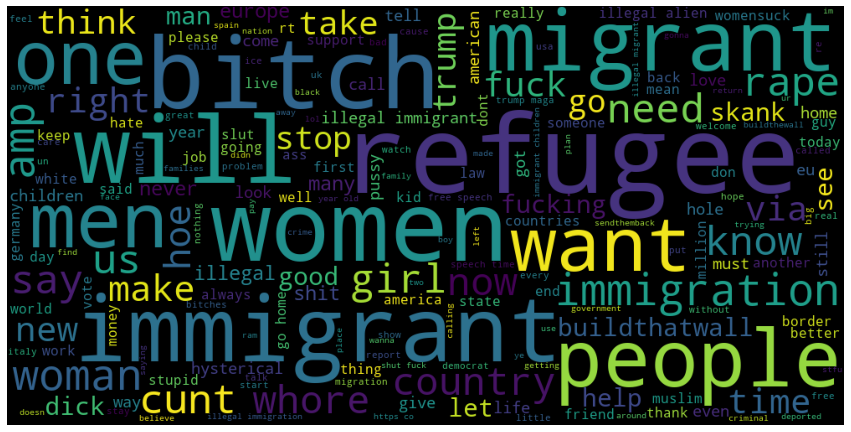

In [6]:
majorwords=' '.join([twt for twt in hate_train['tweets']])
majorwords=WordCloud(width=1000,height=500,random_state=32,max_font_size=130).generate(majorwords)
# plt.imshow(majorwords,interpolation='bilinear')
plt.figure(figsize=(15,8))
plt.imshow(majorwords)
plt.axis("off")

(-0.5, 999.5, 499.5, -0.5)

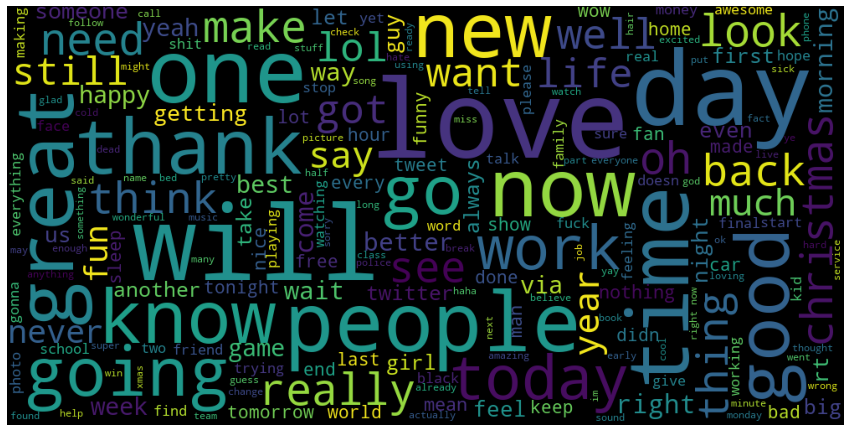

In [7]:
majorwords=' '.join([twt for twt in irony_train['tweets']])
majorwords=WordCloud(width=1000,height=500,random_state=32,max_font_size=130).generate(majorwords)
# plt.imshow(majorwords,interpolation='bilinear')
plt.figure(figsize=(15,8))
plt.imshow(majorwords)
plt.axis("off")

(-0.5, 999.5, 499.5, -0.5)

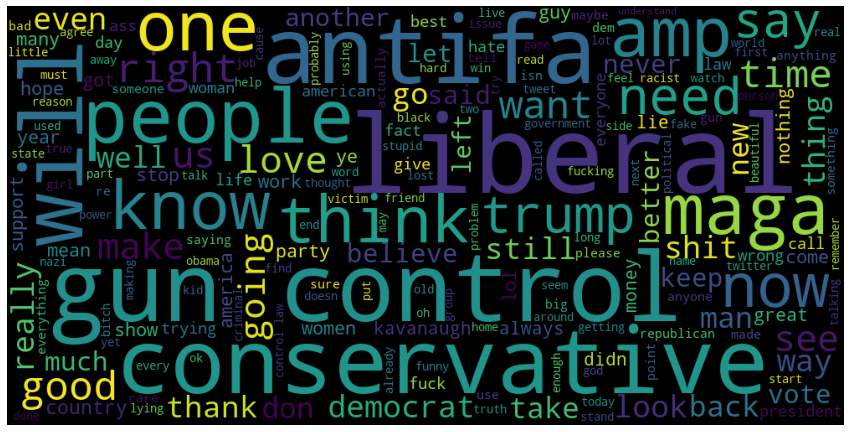

In [8]:
majorwords=' '.join([twt for twt in offensive_train['tweets']])
majorwords=WordCloud(width=1000,height=500,random_state=32,max_font_size=130).generate(majorwords)
# plt.imshow(majorwords,interpolation='bilinear')
plt.figure(figsize=(15,8))
plt.imshow(majorwords)
plt.axis("off")

### Frequency of the words visaulization test set in Hate,Irony and Offensive

(-0.5, 999.5, 499.5, -0.5)

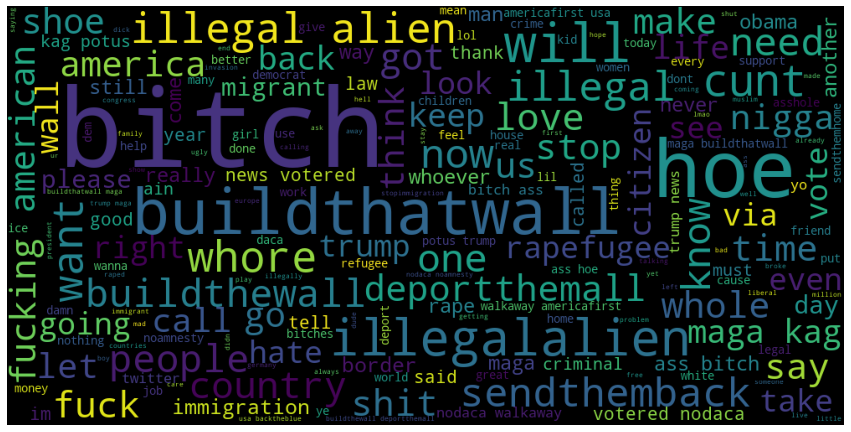

In [ ]:
majorwords=' '.join([twt for twt in hate_train['tweets']])
majorwords= WordCloud(width=1000,height=500,random_state=32,max_font_size=130).generate(majorwords)
# plt.imshow(majorwords,interpolation='bilinear')
plt.figure(figsize=(15,8))
plt.imshow(majorwords)
plt.axis("off")

For performance reasons, we'll only use 2,000 sentences from the dataset

In [ ]:
batch_1 = df[:3000]
batch_2 = df[3000:6000]
batch_3 = df[6000:]

##Loading the Pre-trained BERT model
Let's now load a pre-trained BERT model. 

In [ ]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Right now, the variable `model` holds a pretrained distilBERT model -- a version of BERT that is smaller, but much faster and requiring a lot less memory.

## Model #1: Preparing the Dataset
Before we can hand our sentences to BERT, we need to so some minimal processing to put them in the format it requires.

### Tokenization
Our first step is to tokenize the sentences -- break them up into word and subwords in the format BERT is comfortable with.

In [ ]:
tokenized = batch_1['tweets'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
tokenized_2 = batch_2['tweets'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
tokenized_3 = batch_3['tweets'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))


### Padding
After tokenization, `tokenized` is a list of sentences -- each sentences is represented as a list of tokens. We want BERT to process our examples all at once (as one batch). It's just faster that way. For that reason, we need to pad all lists to the same size, so we can represent the input as one 2-d array, rather than a list of lists (of different lengths).

In [ ]:
max_len = 960

for i in tokenized.values:
  if len(i) > max_len:
    max_len = len(i)

for i in tokenized_2.values:
  if len(i) > max_len:
    max_len = len(i)

for i in tokenized_3.values:
  if len(i) > max_len:
    max_len = len(i)
  

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
padded_2 = np.array([i + [0]*(max_len-len(i)) for i in tokenized_2.values])
padded_3 = np.array([i + [0]*(max_len-len(i)) for i in tokenized_3.values])


Our dataset is now in the padded variable, we can view its dimensions below:

In [ ]:
# padded_test

### Masking
If we directly send `padded` to BERT, that would slightly confuse it. We need to create another variable to tell it to ignore (mask) the padding we've added when it's processing its input. That's what attention_mask is:

In [ ]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask_2 = np.where(padded_2 != 0, 1, 0)
attention_mask_3 = np.where(padded_3 != 0, 1, 0)

attention_mask.shape

(3000, 960)

The `model()` function runs our sentences through BERT. The results of the processing will be returned into `last_hidden_states`.

In [ ]:


input_ids = torch.tensor(padded)
input_ids_2 = torch.tensor(padded_2)
input_ids_3 = torch.tensor(padded_3)

input_ids.shape


torch.Size([3000, 960])

In [ ]:
attention_mask = torch.tensor(attention_mask)
attention_mask_2 = torch.tensor(attention_mask_2)
attention_mask_3 = torch.tensor(attention_mask_3)


In [ ]:
with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

IndexError: ignored

In [ ]:

with torch.no_grad():
  last_hidden_states_2=model(input_ids_2, attention_mask=attention_mask_2)



In [ ]:

with torch.no_grad():
  last_hidden_states_3=model(input_ids_3, attention_mask=attention_mask_3)


In [ ]:
tokenized_test = df_test['tweets'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
# for i in tokenized_test.values:
#   if len(i) > max_len:
#     max_len = len(i)
padded_test = np.array([i + [0]*(max_len-len(i)) for i in tokenized_test.values])
attention_mask_test = np.where(padded_test != 0, 1, 0)
input_ids_test = torch.tensor(padded_test)
attention_mask_test = torch.tensor(attention_mask_test)
# with torch.no_grad():
#   last_hidden_states_test=model(input_ids_test, attention_mask=attention_mask_test)

In [ ]:
input_ids_test.shape

torch.Size([2932, 959])

In [ ]:
with torch.no_grad():
  last_hidden_states_test=model(input_ids_test, attention_mask=attention_mask_test)

IndexError: ignored

In [ ]:

features = np.concatenate((last_hidden_states[0][:,0,:].numpy(), last_hidden_states_2[0][:,0,:].numpy(),last_hidden_states_3[0][:,0,:].numpy()))
# features_test = last_hidden_states_test[0][:,0,:].numpy()

In [ ]:
labels = df['labels']

### Grid Search for Parameters


In [ ]:
# parameters = {'C': np.linspace(0.0001, 100, 20)}
# grid_search = GridSearchCV(LogisticRegression(), parameters)
# grid_search.fit(train_features, train_labels)

# print('best parameters: ', grid_search.best_params_)
# print('best scrores: ', grid_search.best_score_)

In [ ]:
from sklearn import svm
lr_clf = svm.SVC()
lr_clf.fit(features, labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
import pickle
pickle.dump(lr_clf, open('SVM_save', 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)